# Prepping the Data

In [1]:
import pysr
from pysr import PySRRegressor

import xarray as xr
import netCDF4 as nc
#import h5netcdf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from glob import glob

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
folder_path = '/home/laurapong321/leap_24/les_sim_2'

In [3]:
def read_data(filepath):
    """
    Reads in each dataset and returns an xarray dataset
    """

    ds_thm = xr.open_dataset(f"{filepath}",
                             decode_times=False, group="thermo")
    ds_bud = xr.open_dataset(f"{filepath}",
                            decode_times=False, group="budget")
    ds_def = xr.open_dataset(f"{filepath}", 
                             decode_times=False, group="default")
    return xr.merge([ds_thm, ds_bud, ds_def], join="inner")

In [5]:
#opening data
folder_path = '/home/laurapong321/leap_24/les_sim_2'

files = glob(f"{folder_path}/*")

iv16_1 = read_data(files[1])
iv16_3 = read_data(files[2])
i16_6 = read_data(files[3])
iv16_6 = read_data(files[4])
iv16_10 = read_data(files[5])
ii10_1 = read_data(files[6])
i2_20 = read_data(files[7])
iv2_10 = read_data(files[8])
iii2_1 = read_data(files[9])
i2_24 = read_data(files[10])
iii8_3 = read_data(files[11])
ii8_3 = read_data(files[12])
iv8_3 = read_data(files[13])
iv8_6 = read_data(files[14])

# Plots Instructions

### Generate the following plots for data analysis:
 1. Time vs. PBL (Planetary Boundary Layer) height: This plot helps visualize how the boundary layer height varies over time.
 2. Theta vs. Height: Plot Theta (potential temperature) against height to analyze temperature profiles in the atmosphere.
 3. Theta Flux vs. Height: Show how Theta flux (turbulent heat flux) varies with height.

For the plots involving height (Theta vs. Height, Theta Flux vs. Height), consider plotting several time steps.
This approach will illustrate how the profiles evolve with time, providing insights into dynamic changes in the atmosphere.

In [6]:
# weak inversion, ug=8, q=006
iv8_6_plot_var = iv8_6[["zi", "th", "th_flux"]]

Text(0.5, 1.0, 'Plot 1: Time vs PBL')

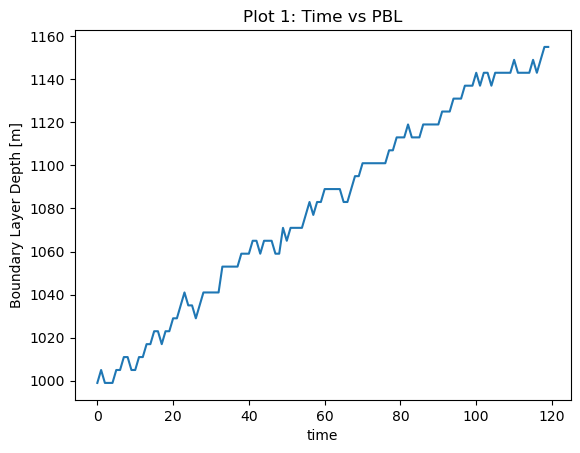

In [7]:
iv8_6_plot_var.zi.plot()
plt.title("Plot 1: Time vs PBL")

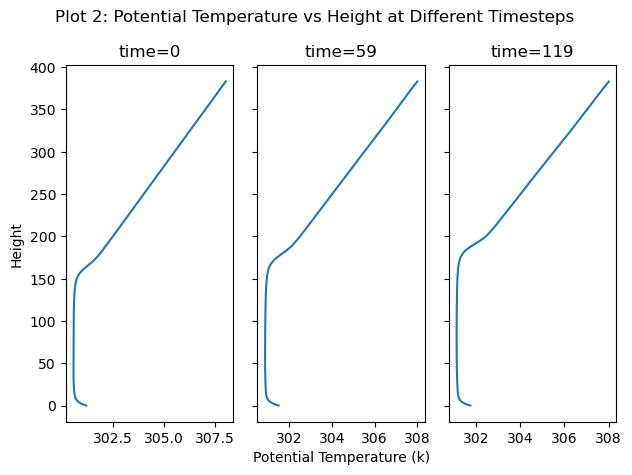

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.suptitle('Plot 2: Potential Temperature vs Height at Different Timesteps')

ax1.plot(iv8_6_plot_var.th.sel(time=0), iv8_6_plot_var.z)
ax1.set_title(f"time=0")
ax1.set_ylabel("Height")

ax2.plot(iv8_6_plot_var.th.sel(time=59), iv8_6_plot_var.z)
ax2.set_title(f"time=59")
ax2.set_xlabel("Potential Temperature (k)")

ax3.plot(iv8_6_plot_var.th.sel(time=119), iv8_6_plot_var.z)
ax3.set_title(f"time=119")

plt.tight_layout()


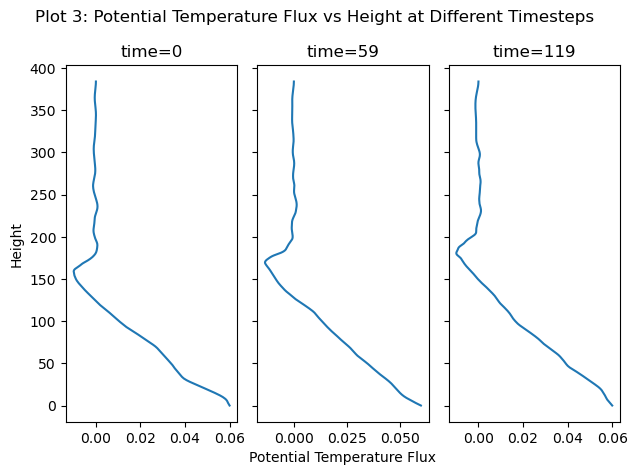

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.suptitle('Plot 3: Potential Temperature Flux vs Height at Different Timesteps')

ax1.plot(iv8_6_plot_var.th_flux.sel(time=0), iv8_6_plot_var.zh)
ax1.set_title(f"time=0")
ax1.set_ylabel("Height")

ax2.plot(iv8_6_plot_var.th_flux.sel(time=59), iv8_6_plot_var.zh)
ax2.set_title(f"time=59")
ax2.set_xlabel("Potential Temperature Flux")

ax3.plot(iv8_6_plot_var.th_flux.sel(time=119), iv8_6_plot_var.zh)
ax3.set_title(f"time=119")

plt.tight_layout()


# Impact of Large-Scale Conditions on Variables

### Overview:
#### Our simulations incorporate three main large-scale variables:
 1. Surface Heating (Q): Influences the heat profile.
 2. Wind (ug): Affects the movement and distribution of air properties.
 3. Inversion (dtheta/dz): Impacts the stratification and stability, influencing PBL growth.

### Objective:
 Analyze how different combinations of these large-scale variables affect the profiles of heat, heat flux, and the growth of the PBL.

### Instructions for Plotting:
 Repeat the plotting process for multiple simulations to compare results. For each variable (heat, heat flux, PBL growth), plot the profiles from several simulations in the same figure. This visualization will help in understanding the differential impacts of Q, ug, and dtheta/dz on the simulated conditions.

 This comparative approach will provide deeper insights into the effects of large-scale atmospheric conditions on local environmental dynamics.


In [10]:
### subsetting data ###



## to compare the effects of inversion

# weak inversion, ug=8, q=003
iv8_3_plot_var = iv8_3[["zi", "th", "th_flux"]]

# strong-medium inversion, ug=8, q=003
ii8_3_plot_var = ii8_3[["zi", "th", "th_flux"]]

# weak-medium inversion, ug=8, q=003
iii8_3_plot_var = iii8_3[["zi", "th", "th_flux"]]


## to compare the effects of q

# weak inversion, ug=16, q=001
iv16_1_plot_var = iv16_1[["zi", "th", "th_flux"]]

# weak inversion, ug=16, q=003
iv16_3_plot_var = iv16_3[["zi", "th", "th_flux"]]


## to compare the effects of ug, compare 
# iv16_3_plot_var and iv8_3_plot_var

## Comparing simulations: Time vs PBL

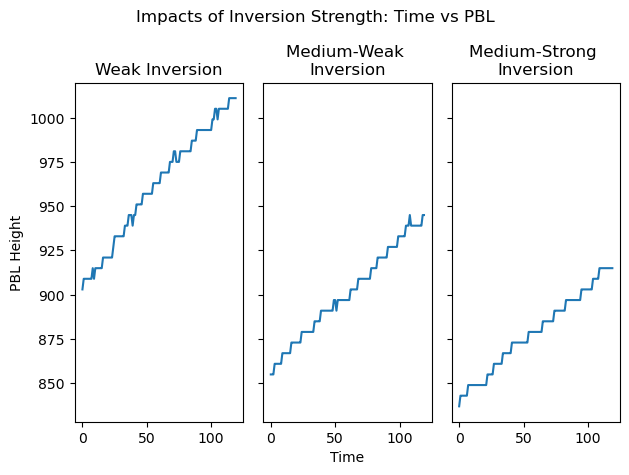

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.suptitle('Impacts of Inversion Strength: Time vs PBL')

ax1.plot(iv8_3_plot_var.zi)
ax1.set_title(f"Weak Inversion")
ax1.set_ylabel("PBL Height")

ax2.plot(iii8_3_plot_var.zi)
ax2.set_title(f"Medium-Weak \nInversion")
ax2.set_xlabel("Time")

ax3.plot(ii8_3_plot_var.zi)
ax3.set_title(f"Medium-Strong \nInversion")

plt.tight_layout()

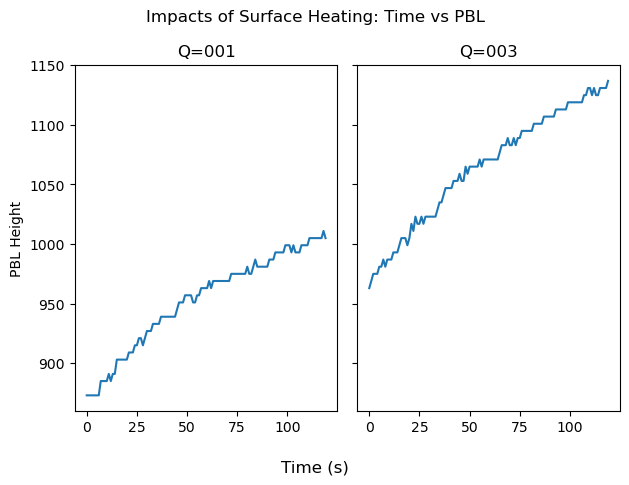

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

fig.suptitle('Impacts of Surface Heating: Time vs PBL')

ax1.plot(iv16_1_plot_var.zi)
ax1.set_title(f"Q=001")
ax1.set_ylabel("PBL Height")

ax2.plot(iv16_3_plot_var.zi)
ax2.set_title(f"Q=003")

fig.supxlabel("Time (s)")
plt.tight_layout()


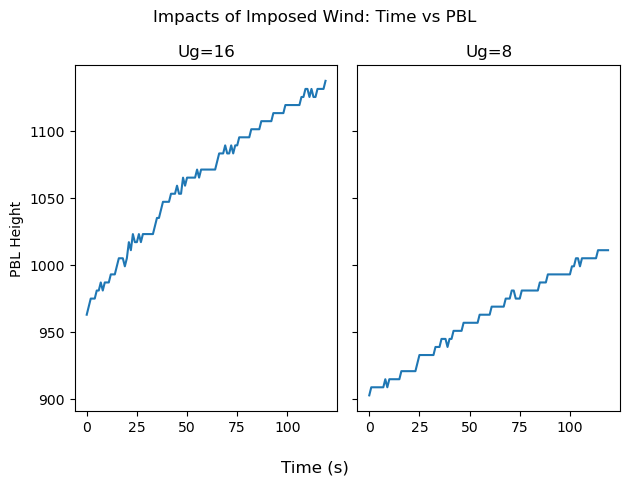

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

fig.suptitle('Impacts of Imposed Wind: Time vs PBL')

ax1.plot(iv16_3_plot_var.zi)
ax1.set_title(f"Ug=16")
ax1.set_ylabel("PBL Height")

ax2.plot(iv8_3_plot_var.zi)
ax2.set_title(f"Ug=8")

fig.supxlabel("Time (s)")
plt.tight_layout()


## Comparing Simulations: Potential Temperature vs Height (at time=100)

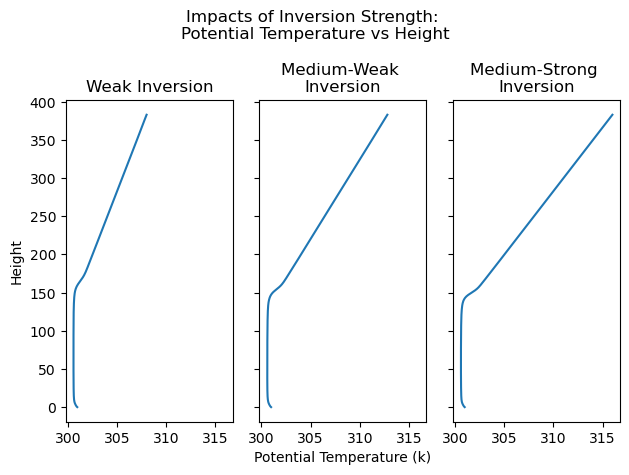

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True)

fig.suptitle('Impacts of Inversion Strength: \nPotential Temperature vs Height')

ax1.plot(iv8_3_plot_var.th.sel(time=100), range(len(iv8_3_plot_var.th.sel(time=100))))
ax1.set_title(f"Weak Inversion")
ax1.set_ylabel("Height")

ax2.plot(iii8_3_plot_var.th.sel(time=100), range(len(iii8_3_plot_var.th.sel(time=100))))
ax2.set_title(f"Medium-Weak \nInversion")
ax2.set_xlabel("Potential Temperature (k)")

ax3.plot(ii8_3_plot_var.th.sel(time=100), range(len(ii8_3_plot_var.th.sel(time=100))))
ax3.set_title(f"Medium-Strong \nInversion")

plt.tight_layout()

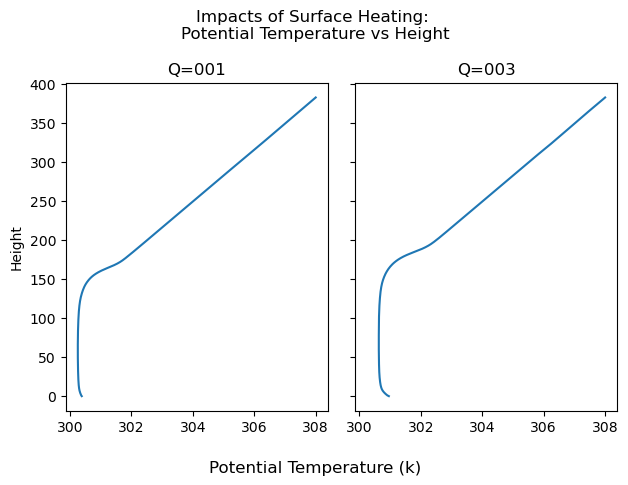

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

fig.suptitle('Impacts of Surface Heating: \nPotential Temperature vs Height')

ax1.plot(iv16_1_plot_var.th.sel(time=100), range(len(iv16_1_plot_var.th.sel(time=100))))
ax1.set_title(f"Q=001")
ax1.set_ylabel("Height")

ax2.plot(iv16_3_plot_var.th.sel(time=100), range(len(iv16_3_plot_var.th.sel(time=100))))
ax2.set_title(f"Q=003")

fig.supxlabel("Potential Temperature (k)")
plt.tight_layout()

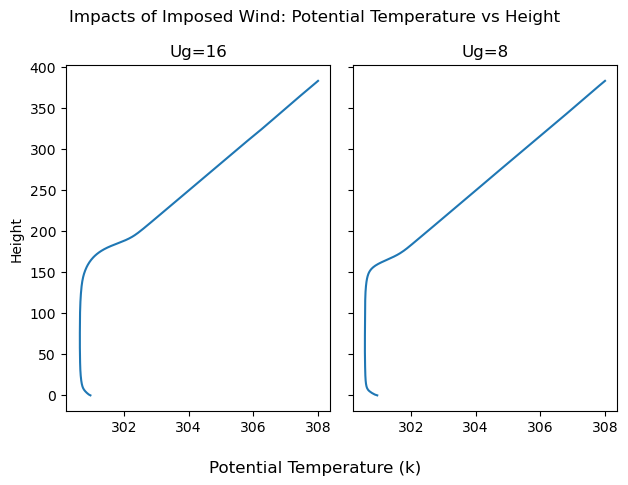

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

fig.suptitle('Impacts of Imposed Wind: Potential Temperature vs Height')

ax1.plot(iv16_3_plot_var.th.sel(time=100), range(len(iv16_3_plot_var.th.sel(time=100))))
ax1.set_title(f"Ug=16")
ax1.set_ylabel("Height")

ax2.plot(iv8_3_plot_var.th.sel(time=100), range(len(iv8_3_plot_var.th.sel(time=100))))
ax2.set_title(f"Ug=8")

fig.supxlabel("Potential Temperature (k)")
plt.tight_layout()


## Comparing Simulations: Potential Temperature Flux vs Height (at time=100)

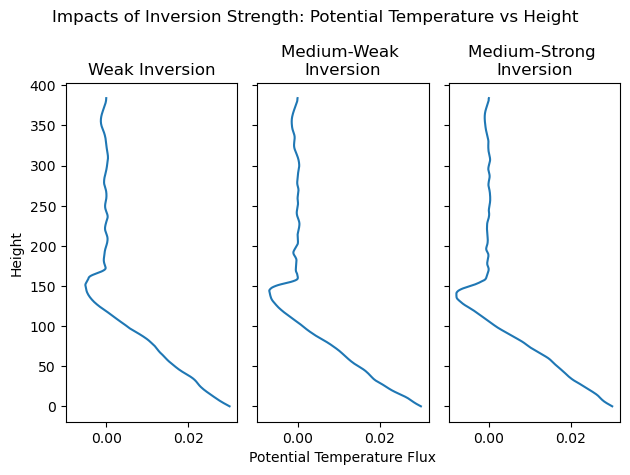

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True)

fig.suptitle('Impacts of Inversion Strength: Potential Temperature vs Height')

ax1.plot(iv8_3_plot_var.th_flux.sel(time=100), range(len(iv8_3_plot_var.th_flux.sel(time=100))))
ax1.set_title(f"Weak Inversion")
ax1.set_ylabel("Height")

ax2.plot(iii8_3_plot_var.th_flux.sel(time=100), range(len(iii8_3_plot_var.th_flux.sel(time=100))))
ax2.set_title(f"Medium-Weak \nInversion")
ax2.set_xlabel("Potential Temperature Flux")

ax3.plot(ii8_3_plot_var.th_flux.sel(time=100), range(len(ii8_3_plot_var.th_flux.sel(time=100))))
ax3.set_title(f"Medium-Strong \nInversion")

plt.tight_layout()

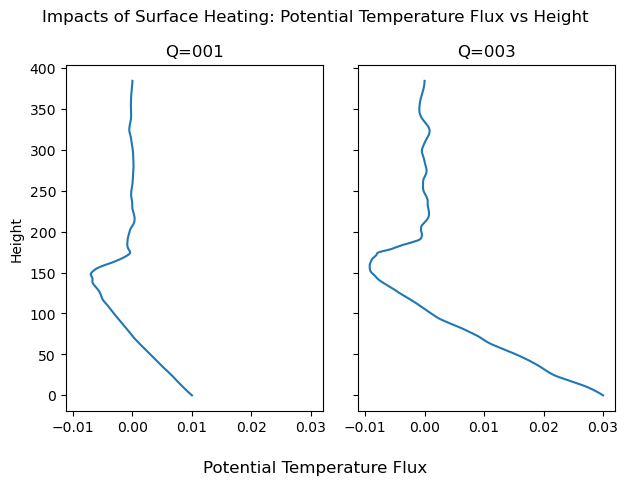

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

fig.suptitle('Impacts of Surface Heating: Potential Temperature Flux vs Height')

ax1.plot(iv16_1_plot_var.th_flux.sel(time=100), range(len(iv16_1_plot_var.th_flux.sel(time=100))))
ax1.set_title(f"Q=001")
ax1.set_ylabel("Height")

ax2.plot(iv16_3_plot_var.th_flux.sel(time=100), range(len(iv16_3_plot_var.th_flux.sel(time=100))))
ax2.set_title(f"Q=003")

fig.supxlabel("Potential Temperature Flux")
plt.tight_layout()

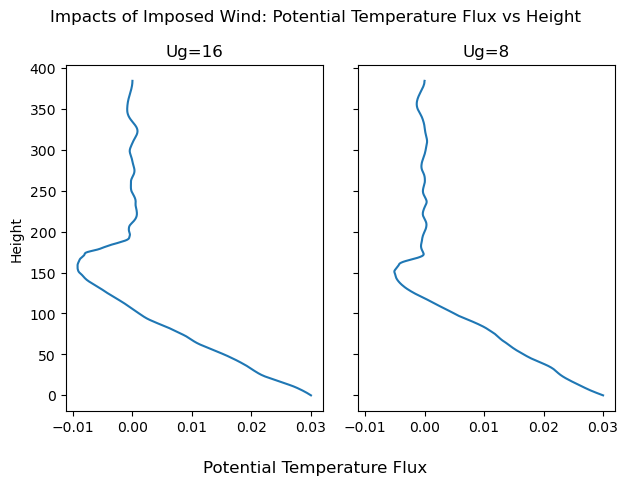

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

fig.suptitle('Impacts of Imposed Wind: Potential Temperature Flux vs Height')

ax1.plot(iv16_3_plot_var.th_flux.sel(time=100), range(len(iv16_3_plot_var.th_flux.sel(time=100))))
ax1.set_title(f"Ug=16")
ax1.set_ylabel("Height")

ax2.plot(iv8_3_plot_var.th_flux.sel(time=100), range(len(iv8_3_plot_var.th_flux.sel(time=100))))
ax2.set_title(f"Ug=8")

fig.supxlabel("Potential Temperature Flux")
plt.tight_layout()


# Equation Discovery for PBL Growth
Identify a list of variables that might influence the growth of the Planetary Boundary Layer (PBL) (represented as dh/dz).
The book chapter has a nice discussion on the relevant variables on the PBL growth. 


Assess whether the Equation Discovery (EQ) method can be used to derive a functional equation that explains PBL growth based on the identified variables.

This task involves both theoretical formulation and empirical verification, aiming to develop a predictive understanding of PBL dynamics.

In [20]:
#printing out all the variables and long names
df = nc.Dataset(files[10], mode='r')
for group_name, group in df.groups.items():
    print(f"Group: {group_name}")
    for var_name, var in group.variables.items():
        long_name = var.getncattr('long_name') if 'long_name' in var.ncattrs() else 'No long_name attribute'
        dimensions = var.dimensions if hasattr(var, 'dimensions') else 'No dimensions attribute'
        print(f"  Variable: {var_name},  Long Name: {long_name},  Dimensions: {dimensions}")
df.close()

Group: default
  Variable: iter,  Long Name: Iteration number,  Dimensions: ('time',)
  Variable: area,  Long Name: Fractional area contained in mask,  Dimensions: ('time', 'z')
  Variable: areah,  Long Name: Fractional area contained in mask,  Dimensions: ('time', 'zh')
  Variable: eft,  Long Name: eft,  Dimensions: ('time', 'z')
  Variable: eft_3,  Long Name: Moment 3 of the eft,  Dimensions: ('time', 'z')
  Variable: eft_4,  Long Name: Moment 4 of the eft,  Dimensions: ('time', 'z')
  Variable: eft_diff,  Long Name: Diffusive flux of the eft,  Dimensions: ('time', 'zh')
  Variable: eft_w,  Long Name: Turbulent flux of the eft,  Dimensions: ('time', 'zh')
  Variable: eft_grad,  Long Name: Gradient of the eft,  Dimensions: ('time', 'zh')
  Variable: eft_2,  Long Name: Moment 2 of the eft,  Dimensions: ('time', 'z')
  Variable: eft_path,  Long Name: eft path,  Dimensions: ('time',)
  Variable: eft_flux,  Long Name: Total flux of the eft,  Dimensions: ('time', 'zh')
  Variable: sft,  Lo

In [292]:
def find_jump(ds, filter_num=.001):
    """
    Returns a dataset with the new variable
     th_jump with only the time coordinate
    """
    #making an array to store all the values of th_jump
    th_jump = np.array([])

    #prepping ds
    ds_jump = ds.copy()
    ds_jump = ds_jump[["th"]]

    #looping through every time and calculating th_jump
    for i in range(len(ds_jump.time)):

        #calculating the second derivate using np.diff
        #(central diff)
        diff_df = np.diff(ds_jump.sel(time=i).th, n=2)

        #putting the array into a dataframe to preserve the index
        #(height var)
        diff_df = pd.DataFrame(diff_df)
        diff_df = diff_df.reset_index()
        diff_df = diff_df.rename(columns={"index": "z", 0:"sec_der"})

        #chopping off the beginning and end of the df
        diff_df = diff_df.iloc[50:350]

        #filtering the df to only select for heights
        #with big enough second derivatives
        diff_df = diff_df[np.abs(diff_df["sec_der"]) >= filter_num]

        if len(diff_df) == 0:
            return "Try different filter num, everything filtered out"
        

        #getting the heights
        if (diff_df.z.iloc[1] - diff_df.z.iloc[0]) <= 1:
            min_z = diff_df.z.iloc[0]
        #making sure to cut off tails of sparse values
        else:
            j = 1
            while (diff_df.z.iloc[j+1] - diff_df.z.iloc[j]) >= 2:
                min_z = diff_df.z.iloc[j]
                j+=1
        
        if (diff_df.z.iloc[-1] - diff_df.z.iloc[-2]) <= 1:
            max_z = diff_df.z.iloc[-1]
        #making sure to cut off tails of sparse values
        else:
            j=-2
            while (diff_df.z.iloc[j] - diff_df.z.iloc[j-1]) >=2:
                max_z = diff_df.z.iloc[j]
                j-=1
        
        #calc th_jump
        jump = (ds_jump.sel(time=i, z=max_z).th.values - ds_jump.sel(time=i, z=min_z).th.values)
        if jump < 0:
            return f"Error in calculation: th_jump at time={i} is negative"

        #adding values to array
        if len(th_jump) == 0:
            th_jump = np.array([jump])
        else:
            th_jump = np.concatenate((th_jump, np.array([jump])))

    if len(th_jump) != len(ds_jump.time):
        return "Error in code"
    
    #adding array of th_jumps to the original ds, index is time
    ds = ds.assign(del_th=(['time'],th_jump))

    return ds
    

Text(0.5, 1.0, '$\\Delta \\theta_p$ over time \nfor weak inversion, $u_g$=8, Q=006')

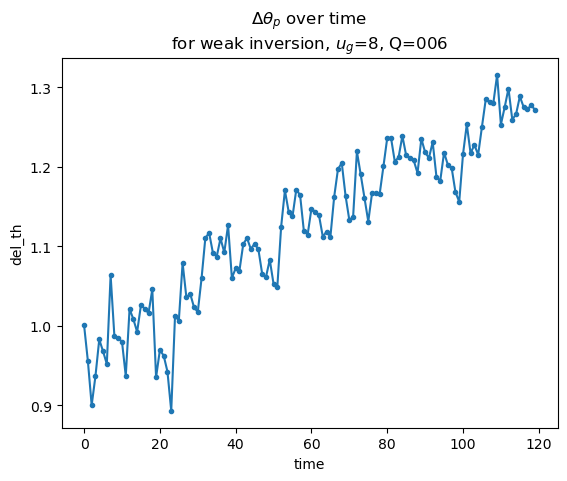

In [321]:
#trying function, making sure that it works
iv8_6_th_jump = find_jump(iv8_6, .00125)
iv8_6_th_jump.del_th.plot(marker=".")
plt.title(f"$\\Delta \\theta_p$ over time \nfor weak inversion, $u_g$=8, Q=006")

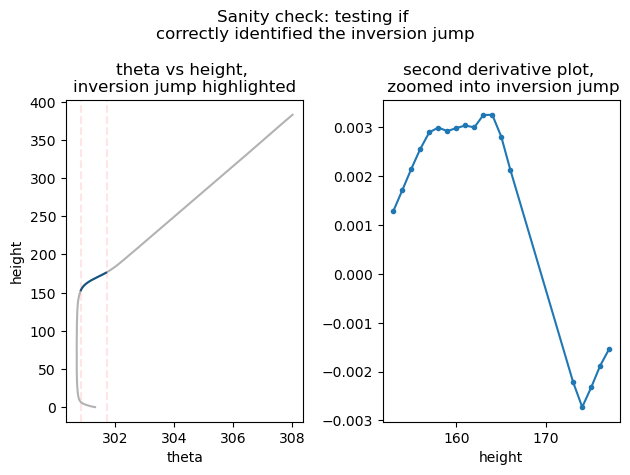

In [313]:
#sanity check
#doing similar code to the function and plotting
test_jump = iv8_6[["th"]]

test = np.diff(test_jump.sel(time=23).th, n=2)
test_df = pd.DataFrame(test)
test_df = test_df.reset_index()
test_df = test_df.iloc[50:350]
test_df = test_df.rename(columns={0:"sec_derive"})

test_df_filter = test_df[np.abs(test_df["sec_derive"]) >= .00125]


#plotting
low_height = test_df_filter["index"].iloc[0]
up_height = test_df_filter["index"].iloc[-1]

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(test_jump.th.sel(time=23,z=slice(low_height,up_height)), test_jump.z.sel(z=slice(low_height, up_height)))
ax1.plot(test_jump.th.sel(time=23), range(len(test_jump.th.sel(time=23))), c="k", alpha=.3)
ax1.set_title("theta vs height, \ninversion jump highlighted")
ax1.axvline(test_jump.th.sel(time=23, z=low_height), c="r", alpha=.1, linestyle='dashed')
ax1.axvline(test_jump.th.sel(time=23, z=up_height), c="r", alpha=.1, linestyle='dashed')
ax1.set_xlabel("theta")
ax1.set_ylabel("height")

ax2.plot(test_df_filter.sec_derive, marker=".")
ax2.set_title("second derivative plot, \n zoomed into inversion jump")
ax2.set_xlabel("height")

fig.suptitle("Sanity check: testing if \ncorrectly identified the inversion jump")
plt.tight_layout()